Training set size: 65000
Test set size: 5000


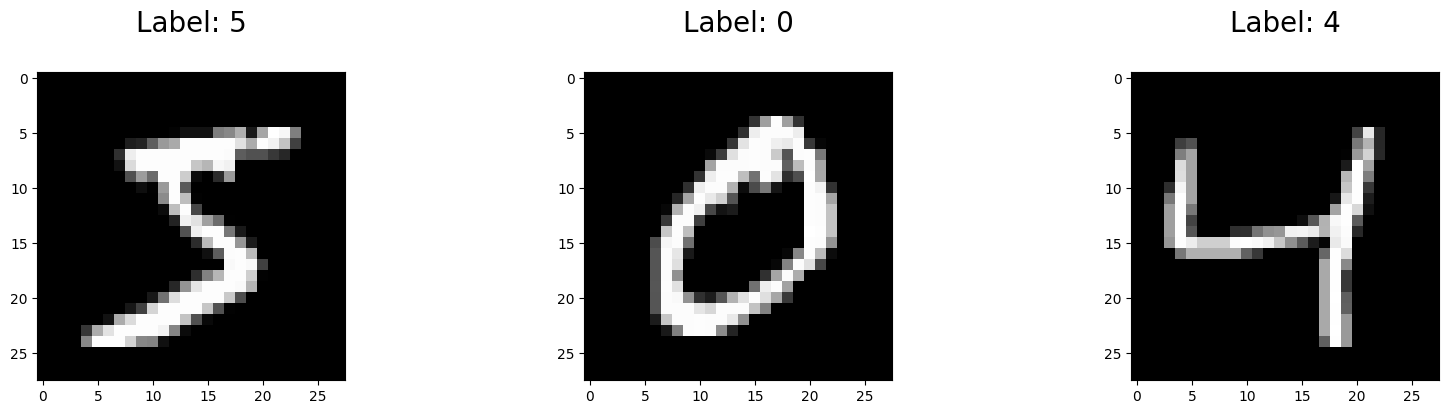

In [5]:
# Load MNIST using sklearn.datasets.fetch_openml

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, parser="auto")

# Split into train and test
X_train, X_test = X[:65000], X[65000:]
y_train, y_test = y[:65000], y[65000:]
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Convert to numpy arrays and scale for the model
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
y_train = np.array(y_train, dtype=np.int8)
y_test = np.array(y_test, dtype=np.int8)

# Show the first 3 images
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X_train[0:3], y_train[0:3])):
    plt.subplot(1, 3, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title("Label: %s\n" % label, fontsize=20)

In [7]:
# Train an MLP classifier using sklearn.neural_network.MLPClassifier

from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier object
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=20,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)


# Train the MLPClassifier
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.31444167
Iteration 2, loss = 0.15406524
Iteration 3, loss = 0.11611518
Iteration 4, loss = 0.09602692
Iteration 5, loss = 0.08185544
Iteration 6, loss = 0.07177249
Iteration 7, loss = 0.06467652
Iteration 8, loss = 0.05798589
Iteration 9, loss = 0.05256720
Iteration 10, loss = 0.04834084
Iteration 11, loss = 0.04472532
Iteration 12, loss = 0.03897338
Iteration 13, loss = 0.03784198
Iteration 14, loss = 0.03464034
Iteration 15, loss = 0.03127055
Iteration 16, loss = 0.02963430
Iteration 17, loss = 0.02717542
Iteration 18, loss = 0.02411111
Iteration 19, loss = 0.02267864
Iteration 20, loss = 0.02150801


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=20,
              random_state=1, solver='sgd', verbose=10)

In [8]:
# Show the accuracy on the training and test sets

print(f"Training set score: {mlp.score(X_train, y_train)}")
print(f"Test set score: {mlp.score(X_test, y_test)}")

Training set score: 0.9945538461538461
Test set score: 0.9818


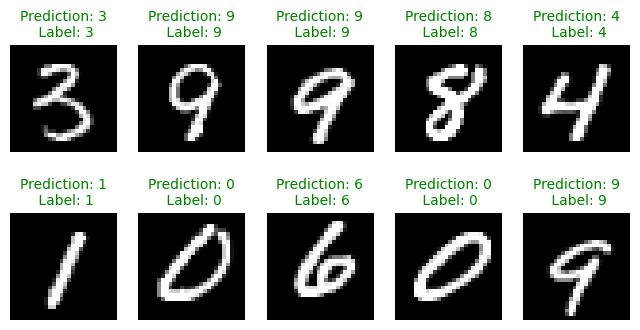

In [9]:
# Show the images, predictions, and original labels for 10 images

# Get the predictions for the test dataset
predictions = mlp.predict(X_test)

# Show the predictions in a grid
plt.figure(figsize=(8, 4))

for index, (image, prediction, label) in enumerate(
    zip(X_test[0:10], predictions[0:10], y_test[0:10])
):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)

    # Green if correct, red if incorrect
    fontcolor = "g" if prediction == label else "r"
    plt.title(
        "Prediction: %i\n Label: %i" % (prediction, label), fontsize=10, color=fontcolor
    )

    plt.axis("off")  # hide axes